In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import sys; sys.path.insert(0, '..')
from _Library import Data_PreProcessing as pre
from _Library import Data_PostProcessing as post
from _Library import Selection as sel
from _Library import Model as mod

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
X = pd.read_feather("../3_Feature Selection/X.feather").set_index("id")
y = pd.read_feather("../3_Feature Selection/y.feather").set_index("id")

### Convert to Float32 and String

In [3]:
X = pre.Convert_to_Float32_and_String(X)
y = pre.Convert_to_Float32_and_String(y)

### Encoding

In [4]:
X, encoder = pre.Encoding_Data_and_Create_Encoder(X)

In [5]:
y = np.ravel(y)

### Split Train/Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### Scaling

In [7]:
X_train, X_test, Scaler_Fitted = pre.Create_Scaler(X_train, X_test)

In [8]:
model = mod.Model_Predict(X_train, y_train)

MSE: 98365275791.84734 
MAE: 208677.81108228563 
MAPE: 8.075071910328786 
R2: 0.9411871974186821


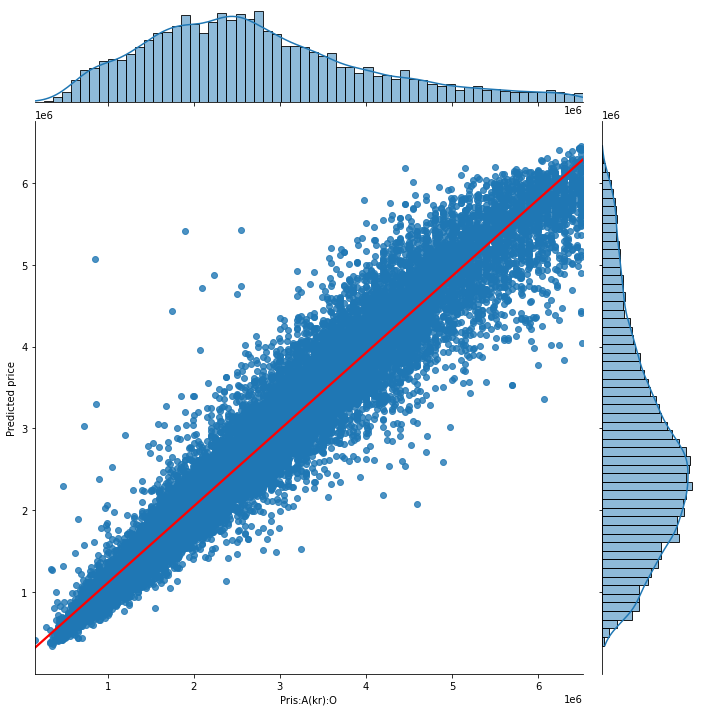

In [9]:
y_concat = mod.Prediction(model, X_test, y_test)

In [10]:
post.Export_Variables(model, Scaler_Fitted, encoder)